In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "heart_disease.csv"
df = pd.read_csv(file_path)

In [4]:
num_rows, num_columns = df.shape
print(f"Rows: {num_rows}, Columns: {num_columns}")

Rows: 10000, Columns: 21


In [5]:
print(df.describe())

               Age  Blood Pressure  Cholesterol Level          BMI  \
count  9971.000000     9981.000000        9970.000000  9978.000000   
mean     49.296259      149.757740         225.425577    29.077269   
std      18.193970       17.572969          43.575809     6.307098   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.658075   
50%      49.000000      150.000000         226.000000    29.079492   
75%      65.000000      165.000000         263.000000    34.520015   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  \
count  9975.000000         9974.000000          9978.000000  9974.000000   
mean      6.991329          250.734409           120.142213     7.472201   
std       1.753195           87.067226            23.584011     4.340248   
min       4.000605          100.000000            80.000000     0

In [6]:
print("Unique values in Gender:", df["Gender"].nunique())
print("Unique values in Smoking:", df["Smoking"].nunique())

Unique values in Gender: 2
Unique values in Smoking: 2


In [7]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
dtype: int64


In [11]:
# Handling missing values for numerical columns (mean)
numeric_cols = df.select_dtypes(include=["number"]).columns
for column in numeric_cols:
    df[column].fillna(df[column].mean(), inplace=True)

# Handling missing values for categorical columns (mode)
categorical_cols = df.select_dtypes(include=["object"]).columns
for column in categorical_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)


C:\Users\Naveed Sheikh\AppData\Local\Temp\ipykernel_1708\1264479224.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\Naveed Sheikh\AppData\Local\Temp\ipykernel_1708\1264479224.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

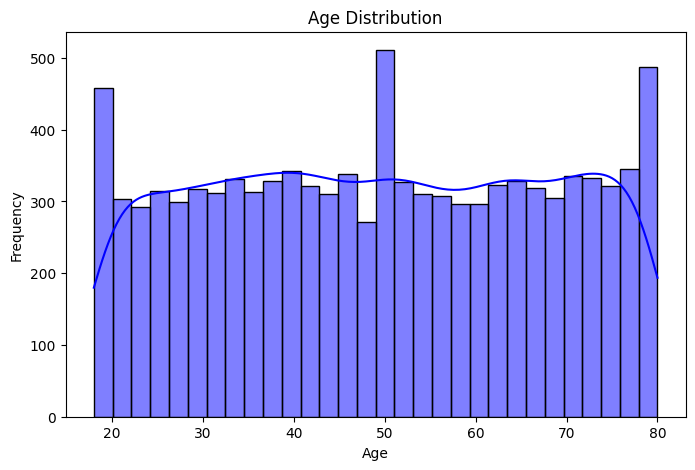

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\Naveed Sheikh\AppData\Local\Temp\ipykernel_1708\296799307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart Disease Status", data=df, palette="Set2")


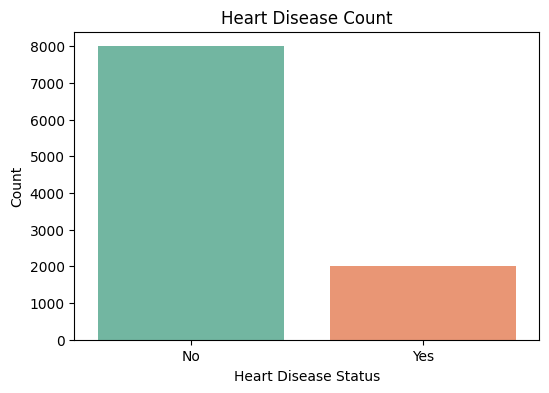

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Heart Disease Status", data=df, palette="Set2")
plt.title("Heart Disease Count")
plt.xlabel("Heart Disease Status")
plt.ylabel("Count")
plt.show()


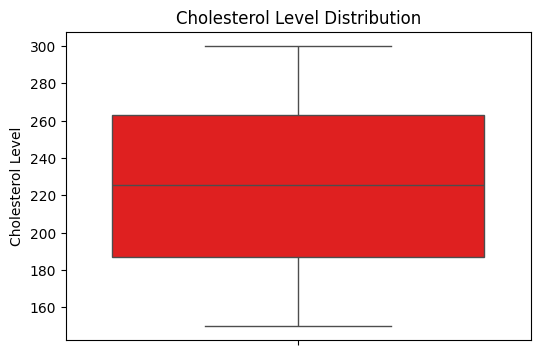

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Cholesterol Level"], color="red")
plt.title("Cholesterol Level Distribution")
plt.ylabel("Cholesterol Level")
plt.show()

1.Median (Q2 - 50th Percentile)

The median cholesterol level is 226, which means half of the people have cholesterol below 226, and half have above 226.

2.Interquartile Range (IQR - 25th to 75th Percentile)
Q1 (25th percentile) = 187
Q3 (75th percentile) = 263
IQR = Q3 - Q1 = 263 - 187 = 76
This means that 50% of the population has cholesterol levels between 187 and 263.

3.Minimum & Maximum, excluding outliers
The minimum (excluding outliers) is around 150.
The maximum (excluding outliers) is 300.

4.Outliers
There are no extreme outliers beyond the whiskers in this dataset.
Summary of Distribution